In [2]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
# "F:/speedy_datasets_james/run_16k_tsteps/output.nc"
ds = nc.Dataset("F:/speedy_datasets_james/run_16k_tsteps/output.nc", mode='r')

In [3]:
ds.variables["temp"]

<class 'netCDF4.Variable'>
float32 temp(time, layer, lat, lon)
    units: K
    long_name: temperature
    _FillValue: nan
unlimited dimensions: time
current shape = (1337, 8, 48, 96)
filling on

In [ ]:
# returns the standard deviation of temporal difference and the full field of variable a
def std_a_temporal_diff(a):
    
    T = a.shape[0]; Y = a.shape[1]; X = a.shape[2]
    
    mu_a = np.mean(a)
    std_a = np.std(a)
    
    # standard normalisation
    a_ff = (a - mu_a)/std_a
    
    # temporal difference
    a_ff_dash = a_ff[1:T-1] - a_ff[0:T-2]
    
    # std of temoporal difference
    inv_TYX = 1/(T*X*Y)
    std_a_ff = inv_TYX*( (a_ff_dash ** 2).sum() ) # 1/TXY(sum_txy( temporal difference squared ) )
    return (np.sqrt(std_a_ff), a_ff)
    

In [4]:
# just picking one layer for now
layer = 0
std_all = np.empty([5])

# meridonal wind, v
v_std_ff = std_a_temporal_diff(ds['v'][:,layer,:,:])
std_all[0] = v_std_ff[0]  #first index is std, second is full field

# zonal wind, u
u_std_ff = std_a_temporal_diff(ds['u'][:,layer,:,:])
std_all[1] = u_std_ff[0]

# humid
humid_std_ff = std_a_temporal_diff(ds['humid'][:,layer,:,:])
std_all[2] = humid_std_ff[0]

# temp
temp_std_ff = std_a_temporal_diff(ds['temp'][:,layer,:,:])
std_all[3] = temp_std_ff[0]

#spres
spres_std_ff = std_a_temporal_diff(ds['spres'][:,:,:])
std_all[4] = spres_std_ff[0]

std_geo_mean = std_all.mean()

# all 5 residuals
v_res = v_std_ff[1]/std_geo_mean
u_res = u_std_ff[1]/std_geo_mean
humid_res = humid_std_ff[1]/std_geo_mean
temp_res = temp_std_ff[1]/std_geo_mean
spres_res = spres_std_ff[1]/std_geo_mean


In [5]:
std_all

array([0.28467237, 0.05138793, 0.13633995, 0.07543937, 0.02191551])

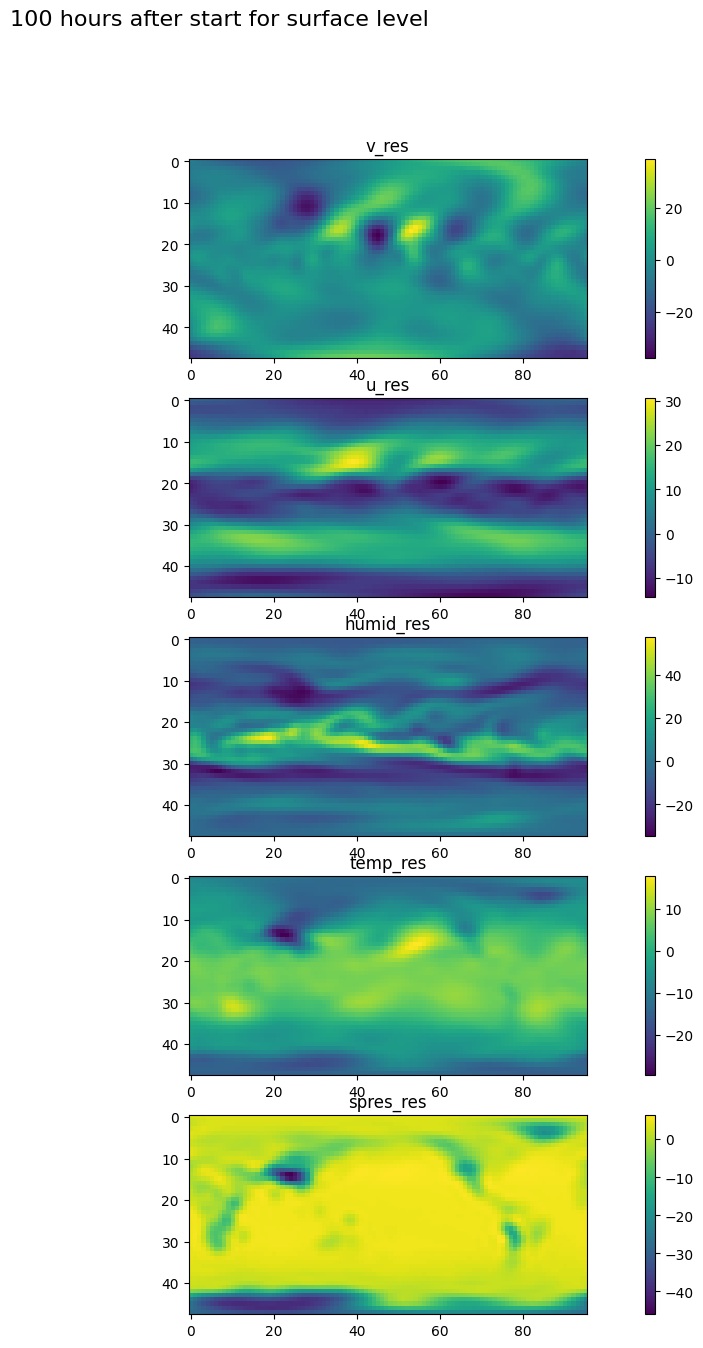

In [6]:
f, ax = plt.subplots(5,1, figsize=(15, 15))

t=100

pos1 = ax[0].imshow(v_res[t])
ax[0].title.set_text('v_res')

pos2 = ax[1].imshow(u_res[t])
ax[1].title.set_text('u_res')

pos3 = ax[2].imshow(humid_res[t])
ax[2].title.set_text('humid_res')

pos4 = ax[3].imshow(temp_res[t])
ax[3].title.set_text('temp_res')

pos5 = ax[4].imshow(spres_res[t])
ax[4].title.set_text('spres_res')

f.suptitle('100 hours after start for surface level', fontsize = 16)

f.colorbar(pos1)
f.colorbar(pos2)
f.colorbar(pos3)
f.colorbar(pos4)
f.colorbar(pos5)

plt.show()
